# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
#import pandas as pd

## imports for Python, Pandas

In [146]:
#import json
#from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [147]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [148]:
# use normalization to create tables from nested element
#json_normalize(data, 'counties')

In [149]:
# further populate tables created from nested element
#json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [150]:
# load json as string
#json.load((open('data/world_bank_projects_less.json')))

In [151]:
# load as Pandas dataframe
#sample_json_df = pd.read_json('data/world_bank_projects_less.json')
#sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [152]:
import json
import pandas as pd
from pandas.io.json import json_normalize


# load json as string
df = pd.read_json('data/world_bank_projects.json')

#type(df)

#df.head()
# normalize the json data set
###json_normalize(data, 'counties')

In [154]:
print(list(df.columns))

['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate', 'borrower', 'closingdate', 'country_namecode', 'countrycode', 'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode', 'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency', 'lendinginstr', 'lendinginstrtype', 'lendprojectcost', 'majorsector_percent', 'mjsector_namecode', 'mjtheme', 'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext', 'productlinetype', 'project_abstract', 'project_name', 'projectdocs', 'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector', 'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode', 'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1', 'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url']


In [4]:

## Question 1

# Find the top 10 countries with the most projects in the data set
# To find this we can pivot the borrower by the id 
# The following analysis treats the data as 1 project per row

# First use pivot_table with borrower as an index, aggregate by the count of projects instances with the given
# borrower values
pvt = df.pivot_table(index = 'borrower', aggfunc = 'count')

# Sort the pvt table by _id in descending order and only store the top 10 borrowers
pvtSorted = pvt.sort_values(by='_id', ascending = False).head(10)

# display the pvtSorted table, only displaying the _id column
pvtSorted['_id']

borrower
MINISTRY OF FINANCE              30
GOVERNMENT OF INDIA              13
SOCIALIST REPUBLIC OF VIETNAM    10
PEOPLE'S REPUBLIC OF CHINA        8
GOVERNMENT OF NEPAL               8
REPUBLIC OF INDONESIA             7
GOVERNMENT OF INDONESIA           6
GOVERNMENT OF BURKINA FASO        5
REPUBLIC OF UZBEKISTAN            5
GOVERNMENT OF MOZAMBIQUE          5
Name: _id, dtype: int64

In [180]:
# Above and beyond stuff, find the top 10 countries with the highest total commitment values

pvtX = df.pivot_table(index = ['borrower'], aggfunc = 'sum')


pvtX
# Sort the pvt table by _id in descending order and only store the top 10 borrowers
pvtXSorted = pvtX.sort_values(by = 'totalcommamt', ascending = False).head(10)

# display the pvtSorted table, only displaying the _id column
pvtXSorted['totalcommamt']


borrower
GOVERNMENT OF INDIA              2185700000
REPUBLIC OF INDONESIA            1616000000
REPUBLIC OF POLAND               1307800000
SOCIALIST REPUBLIC OF VIETNAM    1271760000
MINISTRY OF FINANCE               980840000
PEOPLE'S REPUBLIC OF CHINA        837280000
REPUBLIC OF TURKEY                800000000
GOVERNMENT OF BANGLADESH          662730000
FED DEM REPUBLIC OF ETHIOPIA      600000000
REPUBLIC OF COLOMBIA              600000000
Name: totalcommamt, dtype: int64

In [156]:
## Question 2:

# read in the json file without using pandas
data = json.load((open('data/world_bank_projects.json')))

In [157]:
# normalize the data based on the mjtheme_namecode column
NormalThemes = json_normalize(data, ['mjtheme_namecode'])

In [158]:
# pivot the normalized table NormalThemes by the code column, again aggregating by the count in descending
# order by the count of the name columns in descending order
NormalThemes.pivot_table(index = 'code', aggfunc = 'count').sort_values(by='name', ascending = False)

,name
code,
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50


In [183]:
## Question 3

# Create a lookup object to fill in the missing code name values
LookUp = np.unique(NormalThemes[NormalThemes['name'] != ''])
print(LookUp)

['1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9' 'Economic management'
 'Environment and natural resources management'
 'Financial and private sector development' 'Human development'
 'Public sector governance' 'Rule of law' 'Rural development'
 'Social dev/gender/inclusion' 'Social protection and risk management'
 'Trade and integration' 'Urban development']


In [184]:
# Fill in the missing code names
NormalThemes[(NormalThemes['code'] == '11') & (NormalThemes['name'] == '')] = 'Environment and natural resources management'
NormalThemes[(NormalThemes['code'] == '10') & (NormalThemes['name'] == '')] = 'Rural development'
NormalThemes[(NormalThemes['code'] == '9') & (NormalThemes['name'] == '')] = 'Urban development'
NormalThemes[(NormalThemes['code'] == '8') & (NormalThemes['name'] == '')] = 'Human development'
NormalThemes[(NormalThemes['code'] == '7') & (NormalThemes['name'] == '')] = 'Social dev/gender/inclusion'
NormalThemes[(NormalThemes['code'] == '6') & (NormalThemes['name'] == '')] = 'Social protection and risk management'
NormalThemes[(NormalThemes['code'] == '5') & (NormalThemes['name'] == '')] = 'Trade and integration'
NormalThemes[(NormalThemes['code'] == '4') & (NormalThemes['name'] == '')] = 'Financial and private sector development'
NormalThemes[(NormalThemes['code'] == '3') & (NormalThemes['name'] == '')] = 'Rule of law'
NormalThemes[(NormalThemes['code'] == '2') & (NormalThemes['name'] == '')] = 'Public sector governance'
NormalThemes[(NormalThemes['code'] == '1') & (NormalThemes['name'] == '')] = 'Economic management'

In [185]:
# Display the aggregated pivot table by name and code, showing that the values have been filled in.
NamesPivot = NormalThemes.pivot_table(index = 'name', aggfunc = 'count').sort_values(by='code', ascending = False).head(10)NamesPivot

,code
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


In [201]:
NamesPivot.index

Index(['Environment and natural resources management', 'Rural development',
       'Human development', 'Public sector governance',
       'Social protection and risk management',
       'Financial and private sector development',
       'Social dev/gender/inclusion', 'Trade and integration',
       'Urban development', 'Economic management'],
      dtype='object', name='name')

In [213]:
Count = NamesPivot[['code']]

In [220]:
# Above and beyond 
## plot the normalized theme data frame in a horizontal bar chart
import matplotlib.pyplot as plt

#plt.barh(Count, NamesPivot.index,  align='center', alpha=0.5)

In [228]:
listCount = (NamesPivot[['code']])

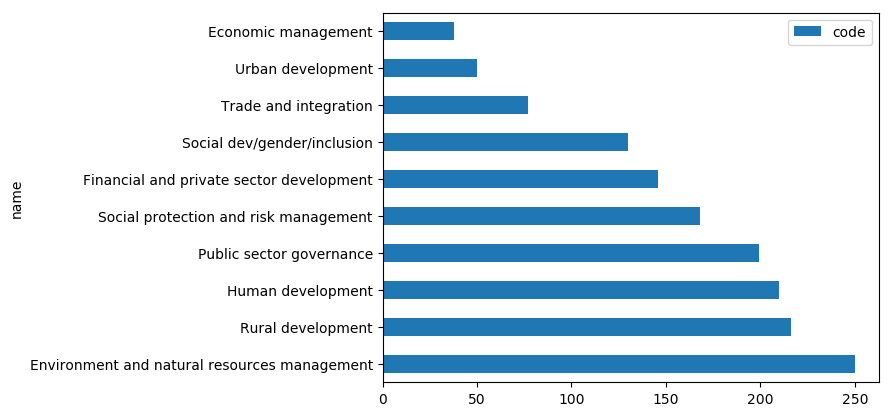

In [234]:
NamesPivot.plot(kind='barh')
plt.show()